In [ ]:
from tensorflow import keras
from keras.constraints import maxnorm
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
num_class = y_test.shape[1]

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout , Flatten , BatchNormalization


In [ ]:
#For avoid overfitting, we use dropout
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_test.shape[1:], activation = 'relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',  activation = 'relu' ))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',  activation = 'relu' ))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',  activation = 'relu' ))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [ ]:
#for multi class problems we use crossentropy
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
#Training the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 30, batch_size= 64)

Epoch 1/30
782/782 [==============================] - 16s 13ms/step - loss: 1.5289 - accuracy: 0.4581 - val_loss: 1.3716 - val_accuracy: 0.5236
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 1.0424 - accuracy: 0.6321 - val_loss: 0.9646 - val_accuracy: 0.6703
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8775 - accuracy: 0.6911 - val_loss: 0.8349 - val_accuracy: 0.7101
Epoch 4/30
782/782 [==============================] - 9s 12ms/step - loss: 0.7856 - accuracy: 0.7211 - val_loss: 0.9421 - val_accuracy: 0.6807
Epoch 5/30
782/782 [==============================] - 10s 12ms/step - loss: 0.7246 - accuracy: 0.7463 - val_loss: 0.7131 - val_accuracy: 0.7557
Epoch 6/30
782/782 [==============================] - 11s 14ms/step - loss: 0.6746 - accuracy: 0.7607 - val_loss: 0.6831 - val_accuracy: 0.7670
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.6420 - accuracy: 0.7740 - val_loss: 0.7015 - val_accuracy: 

In [ ]:
for k,v in history.history.items():
    print(k)


loss
accuracy
val_loss
val_accuracy


<Axes: >

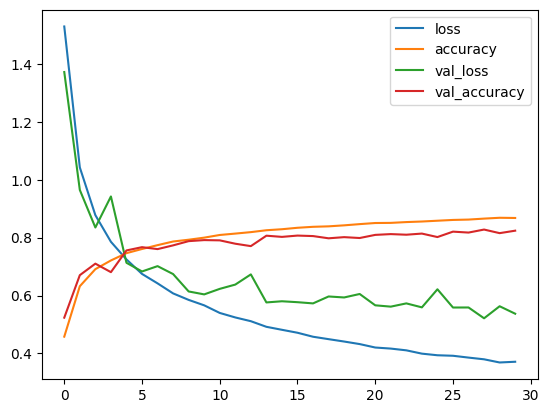

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
model.save('CNN_cifar10')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

313/313 [==============================] - 1s 4ms/step


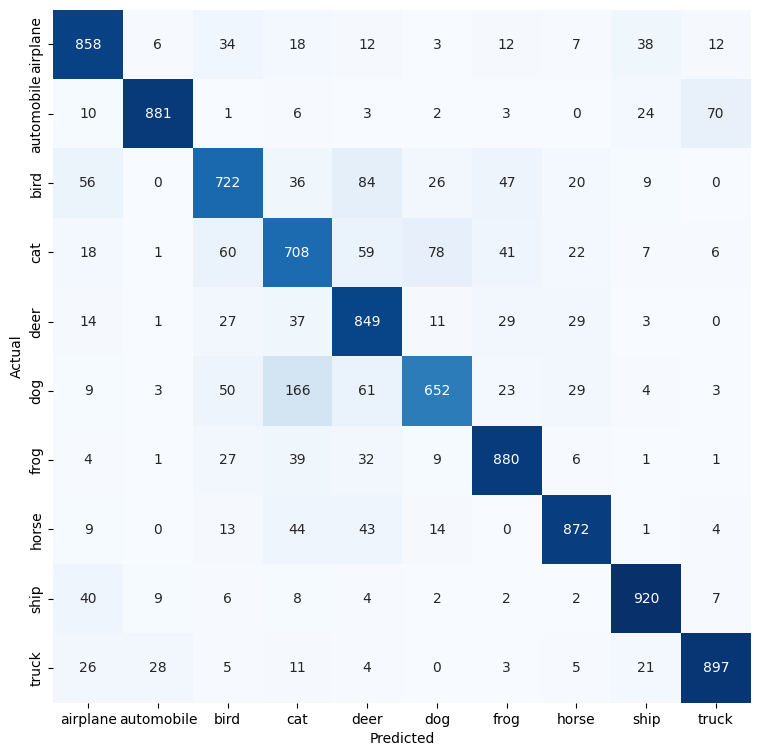

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
